In [2]:
import IPython
from scipy.io import wavfile
import noisereduce as nr
import soundfile as sf
from noisereduce.generate_noise import band_limited_noise
import matplotlib.pyplot as plt
import urllib.request
import librosa
import numpy as np
import io
%matplotlib inline

In [4]:
sr = 16000
e_file1 = 'C:/nmb/nmb_data/clear_voice/testvoice_M2(Clear).wav'

# 10 seconds of each file
data, rate = librosa.load(e_file1, mono=True, sr=sr, offset=0, duration=5.0)
data = data

In [11]:
import sounddevice as sd

sd.play(data, rate)

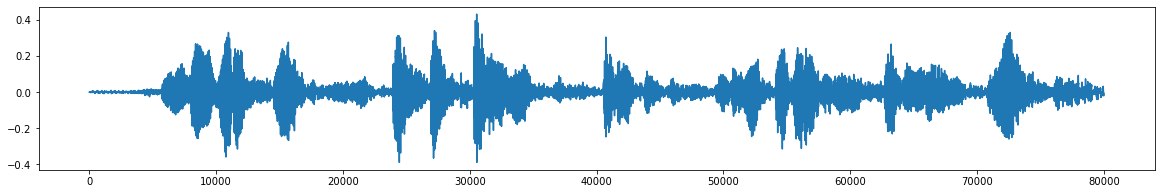

In [12]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(data)

## add noise

In [13]:
noise_len = 2 # seconds
noise = band_limited_noise(min_freq=2000, max_freq = 12000, samples=len(data), samplerate=rate)*10
noise_clip = noise[:rate*noise_len]
audio_clip_band_limited = data+noise

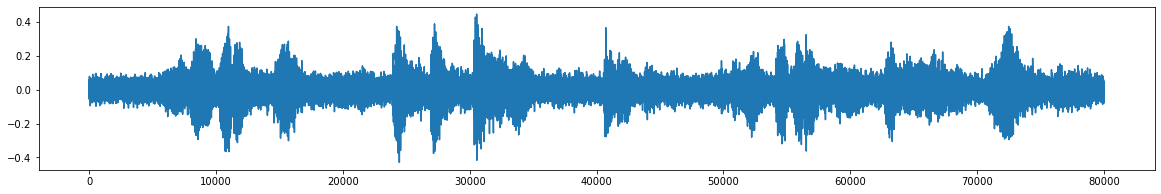

In [14]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(audio_clip_band_limited)

In [15]:
import sounddevice as sd

sd.play(audio_clip_band_limited, rate)

## remove noise

Recover signal:  86%|████████▌ | 6/7 [00:00<00:00, 136.73it/s]

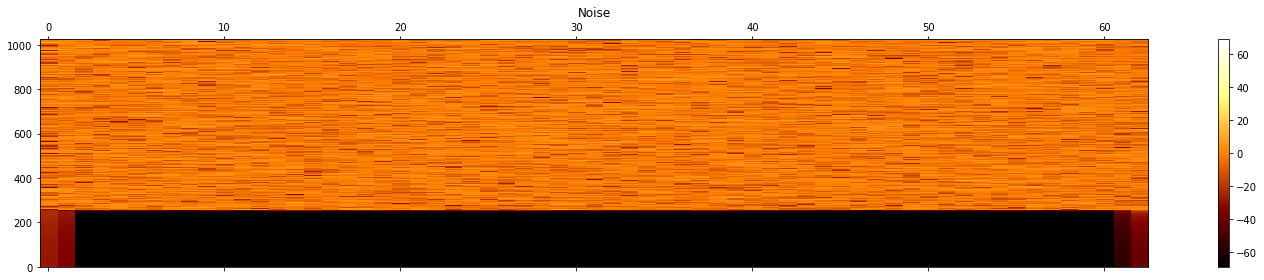

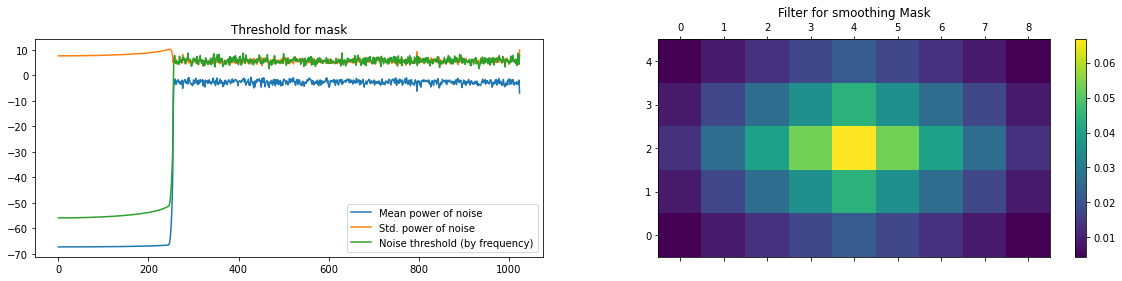

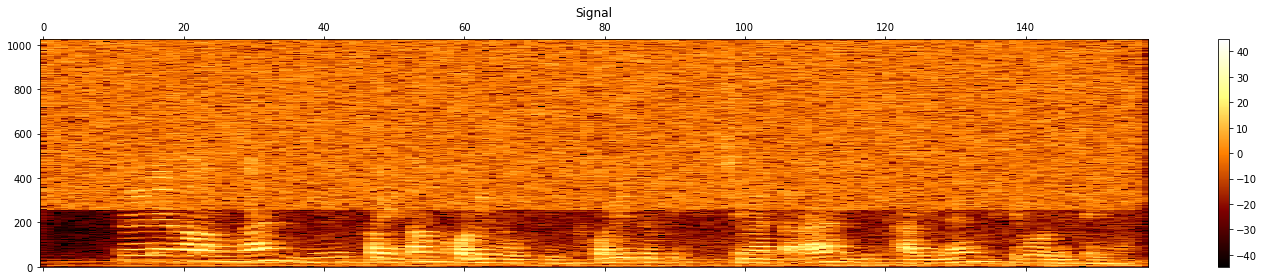

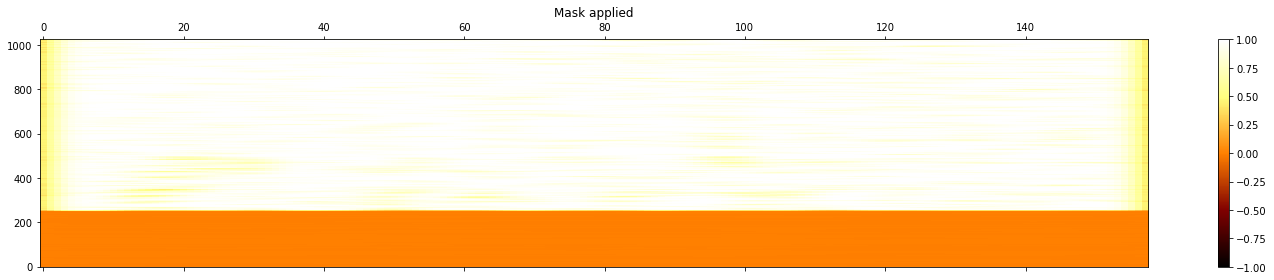

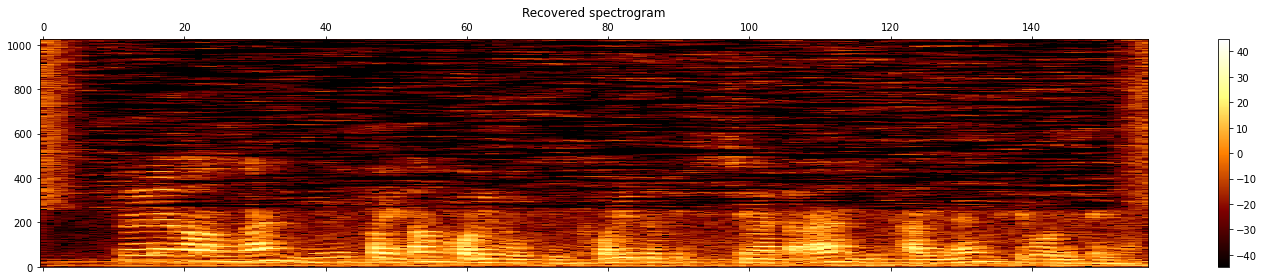

In [16]:
noise_reduced = nr.reduce_noise(audio_clip=audio_clip_band_limited, noise_clip=noise_clip, prop_decrease=1.0, verbose=True)

### playback recovered audio

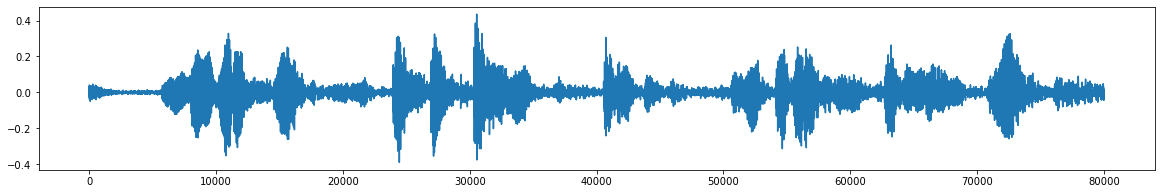

In [17]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot(noise_reduced)

In [20]:
import sounddevice as sd

sd.play(noise_reduced, rate)

## A more difficult example

In [27]:
url = "https://raw.githubusercontent.com/timsainb/noisereduce/master/assets/cafe_short.wav"
response = urllib.request.urlopen(url)
noise1_data, noise_rate = sf.read(io.BytesIO(response.read()))
print(len(noise_data))

cut = 80000
noise_data1 = noise_data[:80000]
print(len(noise_data1))


200542
80000


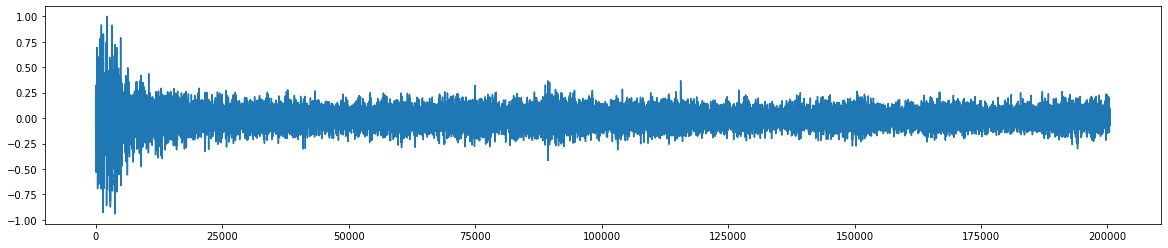

In [25]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(noise1_data)

In [26]:
import sounddevice as sd

sd.play(noise_data, noise_rate)

In [83]:
max(noise_data)

0.999969482421875

## add noise to data

In [142]:
snr = 2 # signal to noise ratio
noise_clip = noise_data/snr
audio_clip_cafe = data + noise_clip

ValueError: operands could not be broadcast together with shapes (80000,) (200542,) 

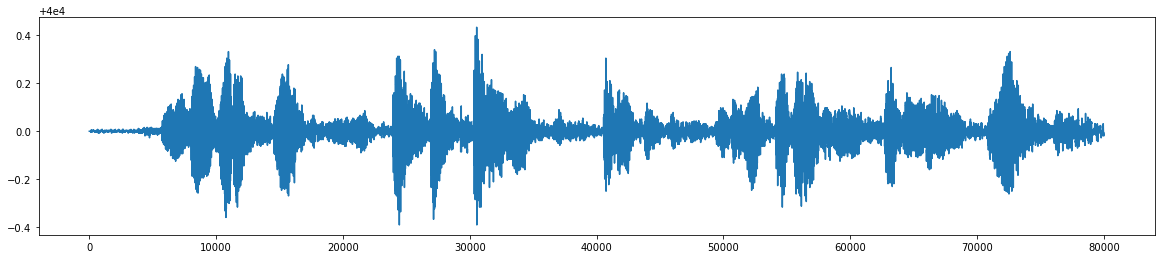

In [139]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(audio_clip_cafe)

In [141]:
import sounddevice as sd

sd.play(audio_clip_cafe, noise_rate)